In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime
import time
from alpha_vantage.techindicators import TechIndicators
from utils import *
from sklearn.preprocessing import MinMaxScaler

np.random.seed(1)

#### Obtain price data and technical indicators

<AxesSubplot:xlabel='Date'>

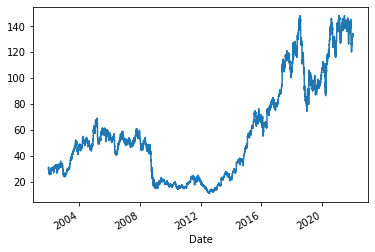

In [2]:
start_date = datetime.datetime(2002, 1, 1)
end_date = datetime.datetime(2022, 1, 1)

ticker = "EA"

history = yf.Ticker(ticker).history(start=start_date, end=end_date)
history["Close"].plot()

In [3]:
intervals = np.arange(6, 21)

In [ ]:
ema = get_ema(ticker, intervals, start_date, end_date)

--- Obtaining EMA ---


In [ ]:

sma = get_sma(ticker, intervals, start_date, end_date)

wma = get_wma(ticker, intervals, start_date, end_date)
t3 = get_t3(ticker, intervals, start_date, end_date)
rsi = get_rsi(ticker, intervals, start_date, end_date)
willr = get_willr(ticker, intervals, start_date, end_date)
adx = get_adx(ticker, intervals, start_date, end_date)
mom = get_mom(ticker, intervals, start_date, end_date)
cci = get_cci(ticker, intervals, start_date, end_date)
cmo = get_cmo(ticker, intervals, start_date, end_date)
roc = get_roc(ticker, intervals, start_date, end_date)
mfi = get_mfi(ticker, intervals, start_date, end_date)
trix = get_trix(ticker, intervals, start_date, end_date)
dx = get_dx(ticker, intervals, start_date, end_date)

--- Obtaining EMA ---


In [ ]:
trima = get_trima(ticker, intervals, start_date, end_date)

In [ ]:
df = pd.concat([history, ema, sma, wma, trima, t3, rsi, willr, adx, mom, cci, cmo, roc, mfi, trix, dx], axis=1)
df = df.dropna()
df = df.drop(["Open", "High", "Low", "Volume", "Dividends", "Stock Splits"], axis=1)
df = df.rename(columns={"Close": "close"})
df.to_csv("EA_15.csv", index_label="date")

#### Read data and create labels

In [ ]:
df = pd.read_csv("EA_15.csv")
df = df.set_index("date")
df.index = pd.to_datetime(df.index)
df

In [ ]:
df.describe()

In [ ]:
num_features = len(df.columns) - 1
shape = (int(np.sqrt(num_features)), int(np.sqrt(num_features)))

In [ ]:
labels = create_labels(df, window_size=3)

In [ ]:
print(f"Sell {sum(labels == 0)}")
print(f"Buy {sum(labels == 1)}")
print(f"Hold {sum(labels == 2)}")

In [ ]:
minmax = MinMaxScaler(feature_range=(0, 1))

x = np.array(df.loc[:, "ema_6":"dx_20"])
x_norm = minmax.fit_transform(x)
x_reshaped = reshape_data(x_norm, shape[0], shape[1])

In [ ]:
w = 10
h = 10

fig = plt.figure(figsize=(w, h))
for i in range(1, 7):
    fig.add_subplot(3, 2, i)
    img = x_reshaped[i+400]
    plt.title(f"x_{i+400}")
    plt.imshow(img, cmap="binary")

plt.show()